# Project of the MNIST Data Using GAN Methods

## Load the useful packages

In [ ]:
import scipy
import numpy as np # manipulate N-dimensional arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # data plotting
import matplotlib.gridspec as gridspec
import seaborn # advanced data plotting
from sklearn import preprocessing # basic ML models
# import scipy # scientific computing library
from tqdm import tqdm #progress bar
#import torch
import time
import os
import pickle
import tensorflow as tf
#from tensorflow.keras import layers, models

In [ ]:
device_list=tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'

In [ ]:
if device_list!='/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:()'.format(device_list))

Found GPU at:()


In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

## Loading the data

In [ ]:
from keras.datasets import mnist
from keras import backend as K

In [ ]:
K.set_image_data_format('channels_last')
(x_train_original, y_train_original), (x_test, y_test) = mnist.load_data(path="mnist.npz")
print('x_train shape:', x_train_original.shape)
print(x_train_original.shape[0], 'train samples')
print(y_train_original.shape, 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
(60000,) train samples
10000 test samples


In [ ]:
# Check number of classes
num_classes = y_train_original.max() +1
num_classes

10

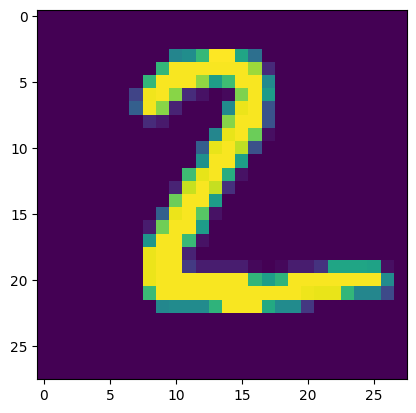

In [ ]:
plt.imshow(x_test[1])

In [ ]:
# Check the class labels
y_train_original

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
LABELS = {
    0 : "Zero",
    1 : "One",
    2 : "Two",
    3 : "Three",
    4 : "Four",
    5 : "Five",
    6 : "Six",
    7 : "Seven",
    8 : "Eight",
    9 : "Nine"
}

## Preprocessing

### Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_original, y_train_original, test_size=10000, random_state=42, shuffle= True, stratify=y_train_original)

In [ ]:
x_train.shape

(50000, 28, 28)

In [ ]:
x_val.shape

(10000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# Check number of samples inside each class
from collections import Counter

In [ ]:
Counter(list(y_train.reshape(-1)))

Counter({7: 5221,
         1: 5618,
         9: 4957,
         3: 5109,
         6: 4932,
         2: 4965,
         0: 4936,
         5: 4518,
         4: 4868,
         8: 4876})

In [ ]:
Counter(list(y_val.reshape(-1)))

Counter({7: 1044,
         8: 975,
         4: 974,
         2: 993,
         9: 992,
         6: 986,
         5: 903,
         1: 1124,
         3: 1022,
         0: 987})

In [ ]:
Counter(list(y_test.reshape(-1)))

Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

### Convert class vectors into binary class matrices

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_original = to_categorical(y_train_original, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [ ]:
# New shape of the labels
y_train_original.shape

(60000, 10)

### Normalize the data

In [ ]:
x_train_original = x_train_original.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

x_train_original /= 255
x_test /= 255
x_train /= 255
x_val /= 255

In [ ]:
# Check new minimum and maximum values
x_train.max(), x_train.min()

(1.0, 0.0)

# GAN

## Configuration of two networks

### Generator Network

### Discriminator Network

### Losses

### Optimizers